# Data Revision
Pre-requisites: Run the notebook `1_data_acquisition.ipynb` to download the labeled data of humpback vocalizations from [Orcasound's AWS open data repository](https://open.quiltdata.com/b/acoustic-sandbox/tree/humpbacks/Emily-Vierling-Orcasound-data/Em_HW_data/flac_files/).

This notebook analyses the labeled data of humpback vocalizations prepared by Emily Vierling. The data set includes ~9,000 labels and is based on ~YY hours of audio data from 3 days during October 03-28, 2021.

In [ ]:
#!pip install librosa

Uncomment the code below if you are using Google Colaboratory. It will connect to the project folder in Google Drive and will use the data from the `data` folder of the project folder.

In [ ]:
#from google.colab import drive
#drive.mount("/content/gdrive")
#%cd gdrive/MyDrive/Colab Notebooks/local_humpback_vocalization/local_humpback_vocalization/notebooks

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/Colab Notebooks/local_humpback_vocalization/local_humpback_vocalization/notebooks


In [ ]:
plots_folder = "../plots"
raw_audio_folder = "../data/raw/audio"
raw_audio_file = "OS_10_03_2021_19_34_00_.flac"
raw_audio_file_path = f"{raw_audio_folder}/{raw_audio_file}"

In [ ]:
x, sr = librosa.load(raw_audio_file_path, sr=44100)
spec_title = raw_audio_file_path.split(".")[0]
print(type(x), type(sr))
print(x.shape, sr)

<class 'numpy.ndarray'> <class 'int'>
(79394111,) 44100


Plotting functions taken from Orcasound's [signal-catalogue](https://github.com/orcasound/signal-catalogue/tree/main) repository.

Text(0.5, 25.722222222222214, 'Time (s)')

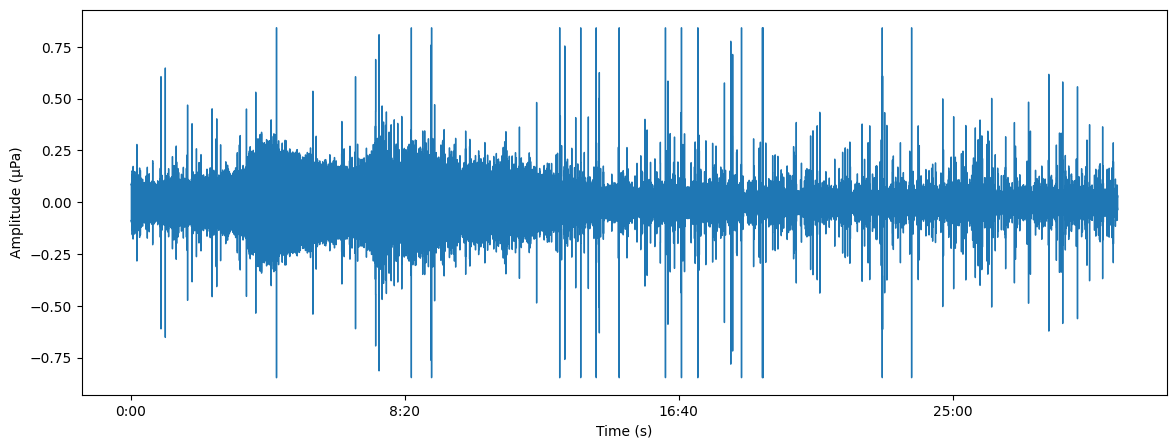

In [ ]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)
plt.title(spec_title, fontsize = 20)
plt.ylabel("Amplitude (µPa)")
plt.xlabel("Time (s)")
#plt.savefig(plots_folder+"{}.jpg".format(spec_title))
#plt.savefig(plots_folder+"{}.png".format(spec_title))

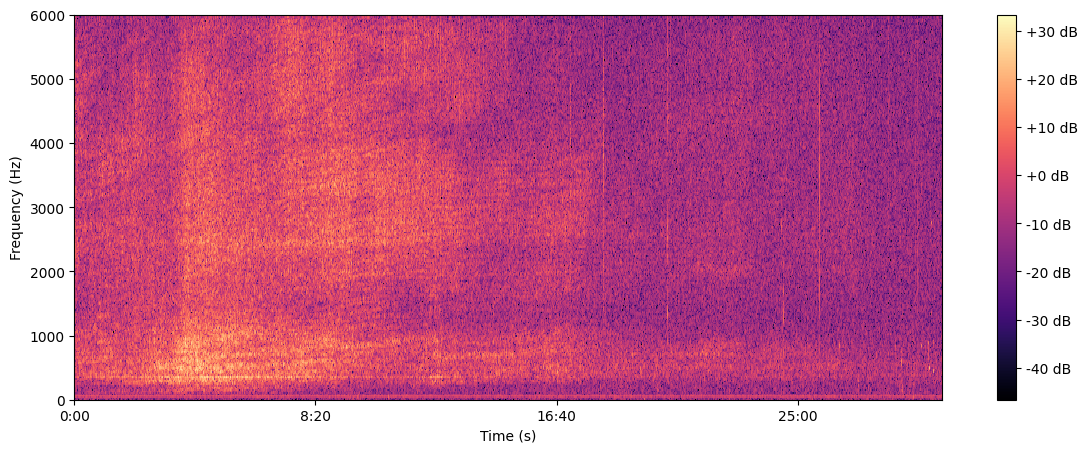

In [ ]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr,cmap="magma", x_axis="time", y_axis="hz")
plt.title(spec_title, fontsize =20)
plt.ylabel ("Frequency (Hz)")
plt.xlabel ("Time (s)")
plt.ylim(0, 6000)
plt.colorbar(format="%+2.f dB")
#plt.savefig(plots_folder+"Linear Frequency Scaling {}.png".format(spec_title))

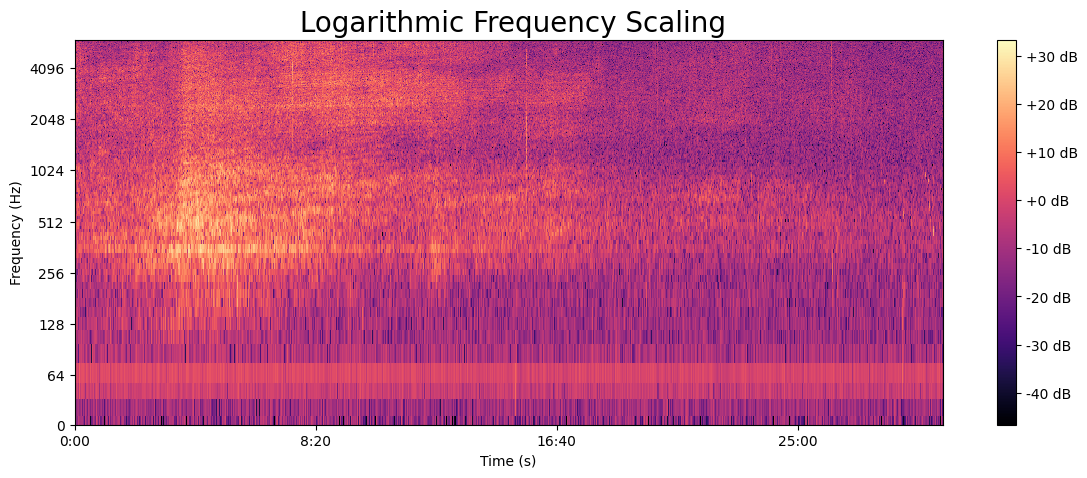

In [ ]:
fig = plt.figure(figsize=(14, 5))
ax = fig.add_subplot(111)
ax.axes.get_xaxis().set_visible(True)
ax.axes.get_yaxis().set_visible(True)
ax.set_frame_on(True)
librosa.display.specshow(Xdb, sr=sr, cmap="magma", x_axis="time", y_axis="log")
plt.ylim(0, 6000)
ax.set_xlabel("Time (s)")
ax.set_ylabel("Frequency (Hz)")
ax.set_title(spec_title + "Logarithmic Frequency Scaling", fontsize = 20)
plt.colorbar(format="%+2.f dB")
#plt.savefig(plots_folder+"Logarithmic Frequency Scaling {}.png".format(spec_title))